## Clustering _ main goal is to categorize simsilar datapoints together
1. KMeans
2. Algomerative clustering


## Based on agge, income and spending categorize similar customers together 

In [13]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [14]:
%pip install yellowbrick plotly nbformat 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Income  Spending
0             1    Male   19      15        39
1             2    Male   21      15        81
2             3  Female   20      16         6
3             4  Female   23      16        77
4             5  Female   31      17        40
..          ...     ...  ...     ...       ...
195         196  Female   35     120        79
196         197  Female   45     126        28
197         198    Male   32     126        74
198         199    Male   32     137        18
199         200    Male   30     137        83

[200 rows x 5 columns]>

In [17]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(200, 5)

In [20]:
x = df[['Age', 'Income', 'Spending']]
x.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [21]:
import plotly.express as px
fig1 = px.scatter_3d(data_frame = x, 
                     x = 'Age',
                     y='Income',
                     z='Spending')
fig1.show()

## Step 4: Preprocess X data

In [22]:
x.dtypes

Age         int64
Income      int64
Spending    int64
dtype: object

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [26]:
num_pipe = Pipeline(steps = [('impute', SimpleImputer(strategy='median')), 
                             ('scaler', StandardScaler())]).set_output(transform = 'pandas')

In [27]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Step 5: Decide number of clusters with K-elbow method

In [28]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

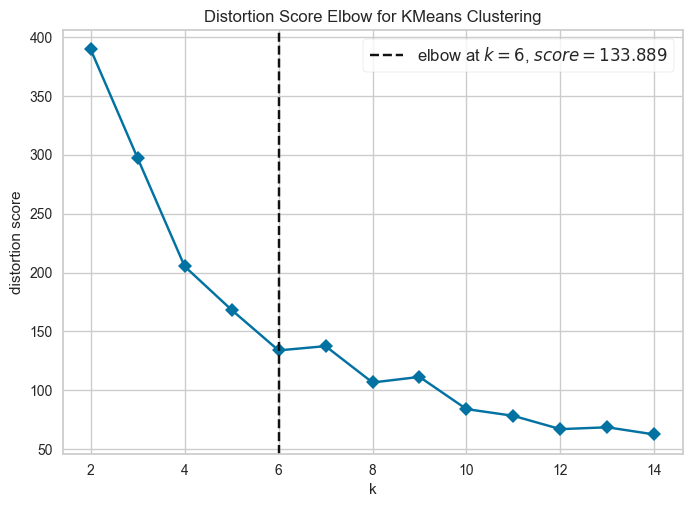

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
model= KMeans()
visualizer = KElbowVisualizer(model, k = (2,15), timings = False)
visualizer.fit(x_pre)
visualizer.show()

## From above graph create 6 clusters with KMeans

In [32]:
best_kmeans = KMeans(n_clusters=6)
best_kmeans.fit(x_pre)

KMeans(n_clusters=6)

In [33]:
labels = best_kmeans.labels_
labels

array([0, 0, 5, 0, 0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 4, 0,
       5, 0, 4, 0, 0, 0, 4, 0, 0, 1, 4, 4, 4, 1, 0, 4, 1, 0, 1, 4, 1, 0,
       4, 1, 0, 0, 1, 4, 1, 1, 1, 0, 4, 4, 0, 4, 1, 4, 1, 4, 0, 4, 4, 0,
       0, 4, 1, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0, 4, 1, 0, 4, 0, 1, 4, 1, 1,
       1, 0, 4, 0, 0, 0, 1, 4, 4, 4, 0, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [34]:
x['label'] = labels

In [35]:
x

,Age,Income,Spending,label
0,19,15,39,0
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2


In [36]:
x.query('label == 0')

,Age,Income,Spending,label
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
4,31,17,40,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0


In [37]:
for i in range(6):
    print(f'Cluster : {i}\n')
    display(x.query(f'label =={i}'))
    print('\n========================\n')

Cluster : 0



,Age,Income,Spending,label
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
4,31,17,40,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0




Cluster : 1



,Age,Income,Spending,label
40,65,38,35,1
53,59,43,60,1
57,69,44,46,1
60,70,46,56,1
62,67,47,52,1
64,63,48,51,1
67,68,48,48,1
70,70,49,55,1
72,60,50,49,1
73,60,50,56,1




Cluster : 2



,Age,Income,Spending,label
124,23,70,29,2
128,59,71,11,2
130,47,71,9,2
132,25,72,34,2
134,20,73,5,2
136,44,73,7,2
138,19,74,10,2
140,57,75,5,2
142,28,76,40,2
144,25,77,12,2




Cluster : 3



,Age,Income,Spending,label
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3
133,31,72,71,3
135,29,73,88,3
137,32,73,73,3
139,35,74,72,3
141,32,75,93,3




Cluster : 4



,Age,Income,Spending,label
42,48,39,36,4
46,50,40,55,4
50,49,42,52,4
54,50,43,45,4
55,47,43,41,4
56,51,44,50,4
59,53,46,46,4
63,54,47,59,4
66,43,48,50,4
71,47,49,42,4




Cluster : 5



,Age,Income,Spending,label
2,20,16,6,5
6,35,18,6,5
8,64,19,3,5
10,67,19,14,5
12,58,20,15,5
14,37,20,13,5
16,35,21,35,5
18,52,23,29,5
20,35,24,35,5
22,46,25,5,5


In [38]:
fig2 = px.scatter_3d(data_frame=x, 
                     x = 'Age', 
                     y= 'Income', 
                     z='Spending',
                     color = 'label')

fig2.show()

## Method 2: Agglomerative clustering
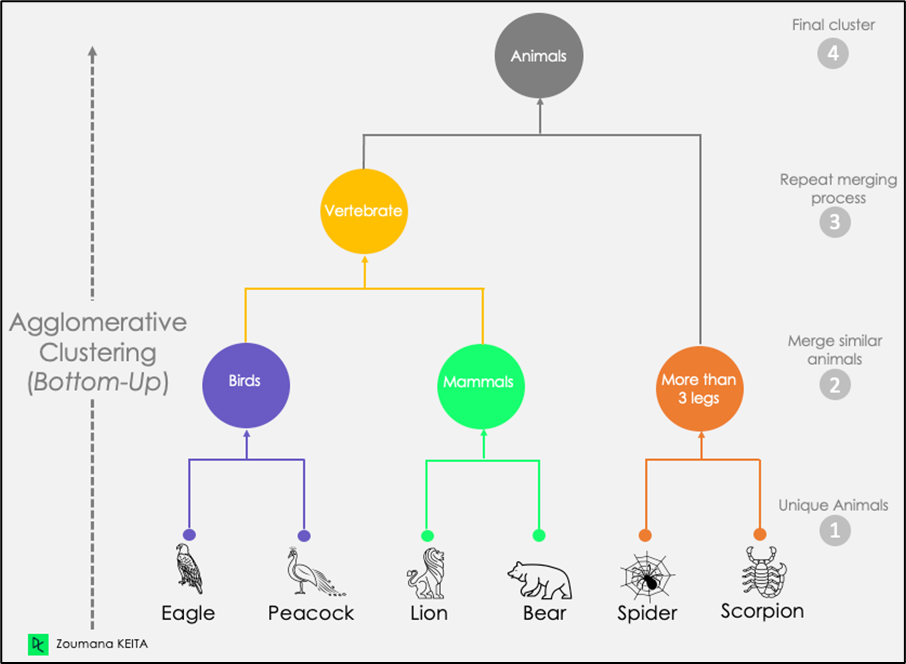

In [2]:
x_pre

NameError: name 'x_pre' is not defined